# **Problem statement:**

Each movie can be classified into different genres.This classification helps users to filter from a corpus of movies according to their taste.This problem statement is basically about predicting the Genre based on the description of the movie.













## **Table of Contents:**


1.   Brief introduction to Multi-Label Classification.
2.   Setting up our Multi-Label Classification Problem Statement.
3.   About the Dataset.
4.   Our Strategy to Build a Movie Genre Prediction Model.
5.   Implementation: Using Multi-Label Classification to Build a Movie Genre Prediction Model.





## **Brief Introduction to Multi-Label Classification**

Before starting to code,Let me introduce you to   Multi label classification.

**Multi-Label Classification:**In this type of classification an instance/record can have multiple labels and the number of labels per instance is not fixed.

Let me explain this using a simple example. Take a look at the below tables, where ‘X’ represents the input variables and ‘y’ represents the target variables (which we are predicting):




![alt text](https://drive.google.com/uc?id=1VWiM9Y4Ovk9YapL9gZW9zFyKpUWtfSJC)







*   ‘y’ is a binary target variable in Table 1. Hence, there are only two labels – t1 and t2.
*   ‘y’ contains more than two labels in Table 2. But, notice how there is only one label for every input in both these tables.
*   You must have guessed why Table 3 stands out. We have multiple tags here, not just across the table, but for individual inputs as well.

We cannot apply traditional classification algorithms directly on this kind of dataset. Why? Because these algorithms expect a single label for every input, when instead we have multiple labels.Hence it is a challenge to build a model for multi classification.





## **Setting up our Multi-Label Classification Problem Statement**

There are several ways of building a recommendation engine. When it comes to movie genres, you can slice and dice the data based on multiple variables. But here’s a simple approach – build a model that can automatically predict genre tags! I can already imagine the possibilities of adding such an option to a recommender. A win-win for everyone.

Our challenge is to build a model that can predict the Genre of a movie using the attributes mentioned below.



1.   title,original_title
2.   tagline
3.   overview.




# **About the dataset:**

The data set consists of multiple attributes but keeping the instructions given to us about the challenge,We have considered **title**, **tagline**, **original_title** and **overview** attributes to predict the **genres** of the movie.The file **movies_metadata** is collected  from the link https://www.kaggle.com/rounakbanik/the-movies-dataset.


1.  **title**,**original_title**:Gives us the insformation about the title of the movie
2.   **tagline**:tagline  gives quick and catchy insight into themes and  plot of the product it wishes to sell.
3.   **overview**:overview attribute  gives us a quick description of the film in more than one sentence.
3.   **genres**:overview attribute  gives us a quick description of the film in more than one sentence.

Hence the target vairable here is **genres**.

## **Our Strategy to Build a Movie Genre Prediction Model**

A normal supervised classification aldorithems can not be used for multi label classification as the model expects a single target variable not a group of them,hence regular supervised algorithems fails here.

So we'll convert the target variable into it's vector form and then predict the label.

Firstly we have to predict the genre of the film using a text so all we have to do is slice and dice the text and convert into it's corresponding tf-idf or count vecoreizer.

Secondly we'll have to convert a target varible into it's corresponding one hot encoding form and then predict it using **OneVsRestClassifier**.

## **Implementation: Using Multi-Label Classification to Build a Movie Genre Prediction Model**

As we have understood completely about the problem,
Let's dive into coding!






---





## **importing the required libraries**

In [59]:
import pandas as pd
import numpy as np
import json
import nltk
import re
import csv
import matplotlib.pyplot as plt 
import seaborn as sns
from tqdm import tqdm
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.model_selection import train_test_split

%matplotlib inline
pd.set_option('display.max_colwidth', 300)

ERROR! Session/line number was not unique in database. History logging moved to new session 59


In [60]:
cd "/content/drive/My Drive/"


/content/drive/My Drive


In [61]:
cd Untitled\ folder

/content/drive/My Drive/Untitled folder


## **Reading the data**

In [62]:
movies=pd.read_csv('movies_metadata.csv')
cols=['title','tagline','original_title','overview','genres']
data=movies[cols]

/usr/local/lib/python3.6/dist-packages/IPython/core/interactiveshell.py:2718: DtypeWarning: Columns (10) have mixed types.Specify dtype option on import or set low_memory=False.
  interactivity=interactivity, compiler=compiler, result=result)


## **EDA and Pre-preocessing**

Converting raw json format into list of genres.

In [63]:
data['new_genres']=""
for a in range(0,data.shape[0]):
    dict=[]
    for i in range(0,len(data.genres[a])):
        
        if data.genres[a][i] == 'n' and data.genres[a][i+1]=='a' and data.genres[a][i+2] == 'm' :
            
        
            str1=data.genres[a][i+8:len(data.genres)-1].split('}')[0]
            str1=str1[0:len(str1)-1]
            
            dict.append(str1)
        

    
    data["new_genres"][a]=dict
    

/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  """Entry point for launching an IPython kernel.
/usr/local/lib/python3.6/dist-packages/IPython/core/interactiveshell.py:2882: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  exec(code_obj, self.user_global_ns, self.user_ns)


In [64]:
data.head()

,title,tagline,original_title,overview,genres,new_genres
0,Toy Story,NaN,Toy Story,"Led by Woody, Andy's toys live happily in his room until Andy's birthday brings Buzz Lightyear onto the scene. Afraid of losing his place in Andy's heart, Woody plots against Buzz. But when circumstances separate Buzz and Woody from their owner, the duo eventually learns to put aside their diffe...","[{'id': 16, 'name': 'Animation'}, {'id': 35, 'name': 'Comedy'}, {'id': 10751, 'name': 'Family'}]","[Animation, Comedy, Family]"
1,Jumanji,Roll the dice and unleash the excitement!,Jumanji,"When siblings Judy and Peter discover an enchanted board game that opens the door to a magical world, they unwittingly invite Alan -- an adult who's been trapped inside the game for 26 years -- into their living room. Alan's only hope for freedom is to finish the game, which proves risky as all ...","[{'id': 12, 'name': 'Adventure'}, {'id': 14, 'name': 'Fantasy'}, {'id': 10751, 'name': 'Family'}]","[Adventure, Fantasy, Family]"
2,Grumpier Old Men,Still Yelling. Still Fighting. Still Ready for Love.,Grumpier Old Men,"A family wedding reignites the ancient feud between next-door neighbors and fishing buddies John and Max. Meanwhile, a sultry Italian divorcée opens a restaurant at the local bait shop, alarming the locals who worry she'll scare the fish away. But she's less interested in seafood than she is in ...","[{'id': 10749, 'name': 'Romance'}, {'id': 35, 'name': 'Comedy'}]","[Romance, Comedy]"
3,Waiting to Exhale,Friends are the people who let you be yourself... and never let you forget it.,Waiting to Exhale,"Cheated on, mistreated and stepped on, the women are holding their breath, waiting for the elusive ""good man"" to break a string of less-than-stellar lovers. Friends and confidants Vannah, Bernie, Glo and Robin talk it all out, determined to find a better way to breathe.","[{'id': 35, 'name': 'Comedy'}, {'id': 18, 'name': 'Drama'}, {'id': 10749, 'name': 'Romance'}]","[Comedy, Drama, Romance]"
4,Father of the Bride Part II,Just When His World Is Back To Normal... He's In For The Surprise Of His Life!,Father of the Bride Part II,"Just when George Banks has recovered from his daughter's wedding, he receives the news that she's pregnant ... and that George's wife, Nina, is expecting too. He was planning on selling their home, but that's a plan that -- like George -- will have to change with the arrival of both a grandchild...","[{'id': 35, 'name': 'Comedy'}]",[Comedy]


In [0]:
#Function to find number of Null values,No of levels and unique levels in the data set
def inspect_data(data) :
      return pd.DataFrame({"Data type": data.dtypes,"NUll Values": data.isnull().sum(),
                           })
 

In [66]:
inspect_data(data)

,Data type,NUll Values
title,object,6
tagline,object,25054
original_title,object,0
overview,object,954
genres,object,0
new_genres,object,0


## **Handling na values**

In [67]:
#I don't see a point of predicting the genre of the film which doesn't have a name.
print("Before removing",data.shape)
data=data[-(data.title.isna())]
print("After removing",data.shape)

Before removing (45466, 6)
After removing (45460, 6)


In [0]:
data['overview']=data['overview'].fillna("")

In [0]:
data['tagline']=data['tagline'].fillna("")

In [70]:
inspect_data(data)

,Data type,NUll Values
title,object,0
tagline,object,0
original_title,object,0
overview,object,0
genres,object,0
new_genres,object,0


### There were multiple na values in overview and title,So if we build a model with just the overrview text the model won't work well because there will be all 0's in vector and the model fails misarably,Hence concaatenating with title and tagline will atlease give some keywords as an input vector hence model works  better.

In [0]:
data['complete_text']=data['title']+" "+data['overview']+" "+data['tagline']

In [72]:
data.head()

,title,tagline,original_title,overview,genres,new_genres,complete_text
0,Toy Story,,Toy Story,"Led by Woody, Andy's toys live happily in his room until Andy's birthday brings Buzz Lightyear onto the scene. Afraid of losing his place in Andy's heart, Woody plots against Buzz. But when circumstances separate Buzz and Woody from their owner, the duo eventually learns to put aside their diffe...","[{'id': 16, 'name': 'Animation'}, {'id': 35, 'name': 'Comedy'}, {'id': 10751, 'name': 'Family'}]","[Animation, Comedy, Family]","Toy Story Led by Woody, Andy's toys live happily in his room until Andy's birthday brings Buzz Lightyear onto the scene. Afraid of losing his place in Andy's heart, Woody plots against Buzz. But when circumstances separate Buzz and Woody from their owner, the duo eventually learns to put aside t..."
1,Jumanji,Roll the dice and unleash the excitement!,Jumanji,"When siblings Judy and Peter discover an enchanted board game that opens the door to a magical world, they unwittingly invite Alan -- an adult who's been trapped inside the game for 26 years -- into their living room. Alan's only hope for freedom is to finish the game, which proves risky as all ...","[{'id': 12, 'name': 'Adventure'}, {'id': 14, 'name': 'Fantasy'}, {'id': 10751, 'name': 'Family'}]","[Adventure, Fantasy, Family]","Jumanji When siblings Judy and Peter discover an enchanted board game that opens the door to a magical world, they unwittingly invite Alan -- an adult who's been trapped inside the game for 26 years -- into their living room. Alan's only hope for freedom is to finish the game, which proves risky..."
2,Grumpier Old Men,Still Yelling. Still Fighting. Still Ready for Love.,Grumpier Old Men,"A family wedding reignites the ancient feud between next-door neighbors and fishing buddies John and Max. Meanwhile, a sultry Italian divorcée opens a restaurant at the local bait shop, alarming the locals who worry she'll scare the fish away. But she's less interested in seafood than she is in ...","[{'id': 10749, 'name': 'Romance'}, {'id': 35, 'name': 'Comedy'}]","[Romance, Comedy]","Grumpier Old Men A family wedding reignites the ancient feud between next-door neighbors and fishing buddies John and Max. Meanwhile, a sultry Italian divorcée opens a restaurant at the local bait shop, alarming the locals who worry she'll scare the fish away. But she's less interested in seafoo..."
3,Waiting to Exhale,Friends are the people who let you be yourself... and never let you forget it.,Waiting to Exhale,"Cheated on, mistreated and stepped on, the women are holding their breath, waiting for the elusive ""good man"" to break a string of less-than-stellar lovers. Friends and confidants Vannah, Bernie, Glo and Robin talk it all out, determined to find a better way to breathe.","[{'id': 35, 'name': 'Comedy'}, {'id': 18, 'name': 'Drama'}, {'id': 10749, 'name': 'Romance'}]","[Comedy, Drama, Romance]","Waiting to Exhale Cheated on, mistreated and stepped on, the women are holding their breath, waiting for the elusive ""good man"" to break a string of less-than-stellar lovers. Friends and confidants Vannah, Bernie, Glo and Robin talk it all out, determined to find a better way to breathe. Friends..."
4,Father of the Bride Part II,Just When His World Is Back To Normal... He's In For The Surprise Of His Life!,Father of the Bride Part II,"Just when George Banks has recovered from his daughter's wedding, he receives the news that she's pregnant ... and that George's wife, Nina, is expecting too. He was planning on selling their home, but that's a plan that -- like George -- will have to change with the arrival of both a grandchild...","[{'id': 35, 'name': 'Comedy'}]",[Comedy],"Father of the Bride Part II Just when George Banks has recovered from his daughter's wedding, he receives the news that she's pregnant ... and that George's wife, Nina, is expecting too. He was planning on selling their home, but that's a plan that -- like George -- will have to change with the .

In [73]:
data.shape

(45460, 7)

In [74]:
# remove samples with 0 genre tags
print(data[~(data['new_genres'].str.len() == 0)].shape )

(43018, 7)


In [75]:
#There's no point in training the model without target variables.So let's remove them

print("Before removing",data.shape)
data=data[~(data['new_genres'].str.len() == 0)]
print("After removing",data.shape)

Before removing (45460, 7)
After removing (43018, 7)


In [76]:
all_genres = sum(data['new_genres'],[])
len(set(all_genres))

20

In [0]:
from collections import Counter
b=Counter(all_genres)

In [78]:
df = pd.DataFrame.from_dict(b, orient='index').reset_index()
df

,index,0
0,Animation,1934
1,Comedy,13182
2,Family,2770
3,Adventure,3496
4,Fantasy,2313
5,Romance,6735
6,Drama,20264
7,Action,6594
8,Crime,4307
9,Thriller,7623


In [79]:
df = df.rename(columns={'index':'Genre', 0:'count'})
df

,Genre,count
0,Animation,1934
1,Comedy,13182
2,Family,2770
3,Adventure,3496
4,Fantasy,2313
5,Romance,6735
6,Drama,20264
7,Action,6594
8,Crime,4307
9,Thriller,7623


## **Visualizations**

Visualization of the count of genres.

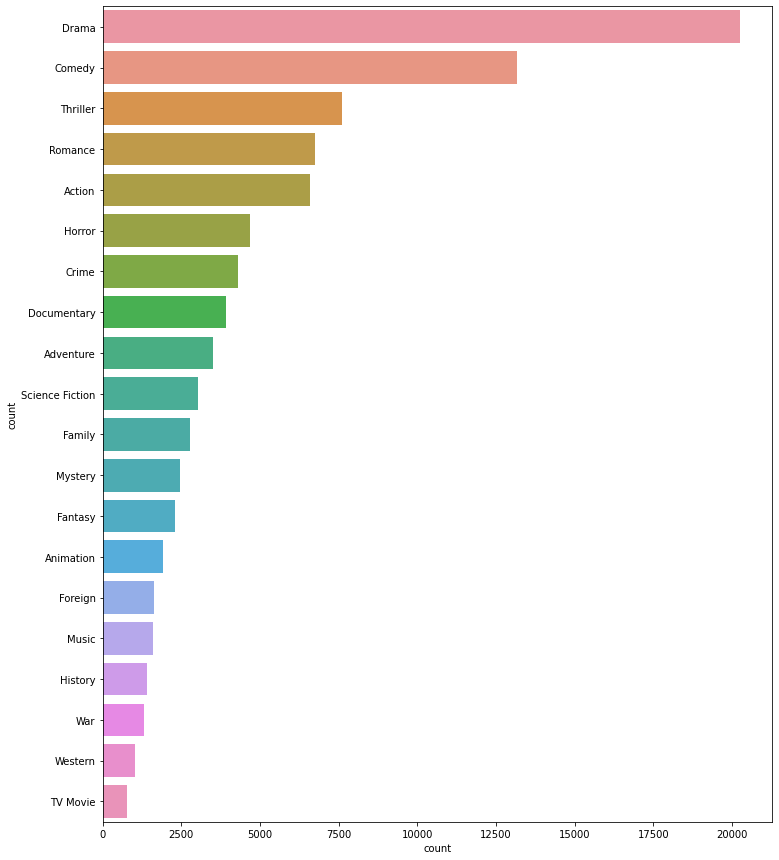

In [80]:
import matplotlib.pyplot as plt 
g = df.nlargest(columns="count", n = 50) 
plt.figure(figsize=(12,15)) 
ax = sns.barplot(data=g, x= "count", y = "Genre") 
ax.set(ylabel = 'count') 
plt.show()

In [0]:
# function for text cleaning 
import re
def clean_text(text):
    # remove backslash-apostrophe 
    text = re.sub("\'", "", text) 
    # remove everything except alphabets 
    text = re.sub("[^a-zA-Z]"," ",text) 
    # remove whitespaces 
    text = ' '.join(text.split()) 
    # convert text to lowercase 
    text = text.lower() 
    
    return text

In [0]:
data['clean_plot'] = data['complete_text'].apply(lambda x: clean_text(x))

Visualization of count of each word in the textwith stop words

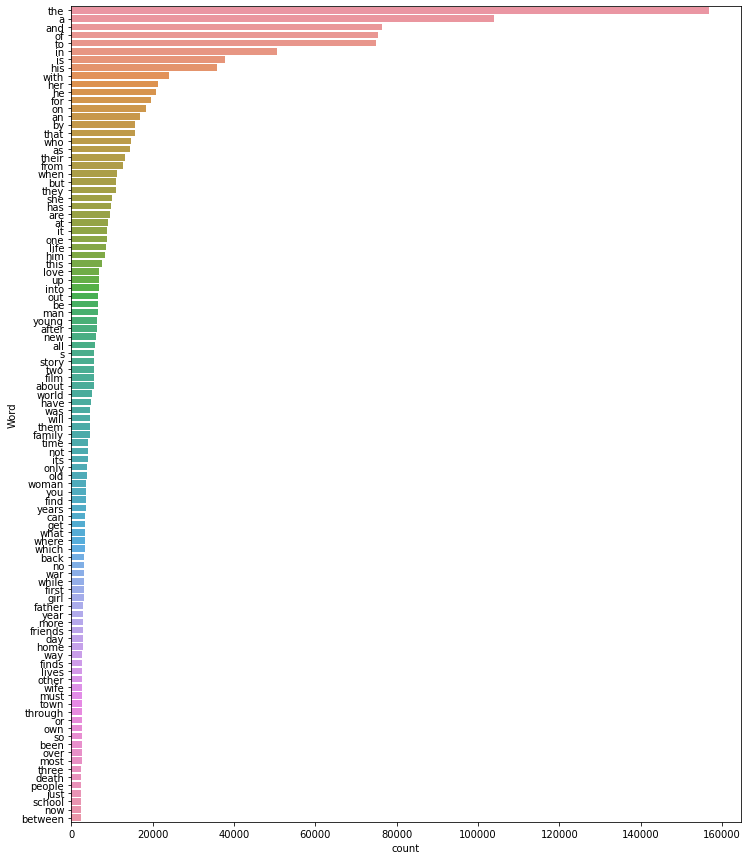

In [83]:
import nltk
def freq_words(x, terms = 30): 
  all_words = ' '.join([text for text in x]) 
  all_words = all_words.split() 
  fdist = nltk.FreqDist(all_words) 
  words_df = pd.DataFrame({'word':list(fdist.keys()), 'count':list(fdist.values())}) 
  
  # selecting top 20 most frequent words 
  d = words_df.nlargest(columns="count", n = terms) 
  
  # visualize words and frequencies
  plt.figure(figsize=(12,15)) 
  ax = sns.barplot(data=d, x= "count", y = "word") 
  ax.set(ylabel = 'Word') 
  plt.show()
  
# print 100 most frequent words 
freq_words(data['clean_plot'], 100)

In [84]:
nltk.download('stopwords')

[nltk_data] Downloading package stopwords to /root/nltk_data...
[nltk_data]   Package stopwords is already up-to-date!


True

In [0]:
from nltk.corpus import stopwords
stop_words = set(stopwords.words('english'))

# function to remove stopwords
def remove_stopwords(text):
    no_stopword_text = [w for w in text.split() if not w in stop_words]
    return ' '.join(no_stopword_text)

data['clean_plot'] = data['clean_plot'].apply(lambda x: remove_stopwords(x))

Visualization of count of each word in the text without stop words

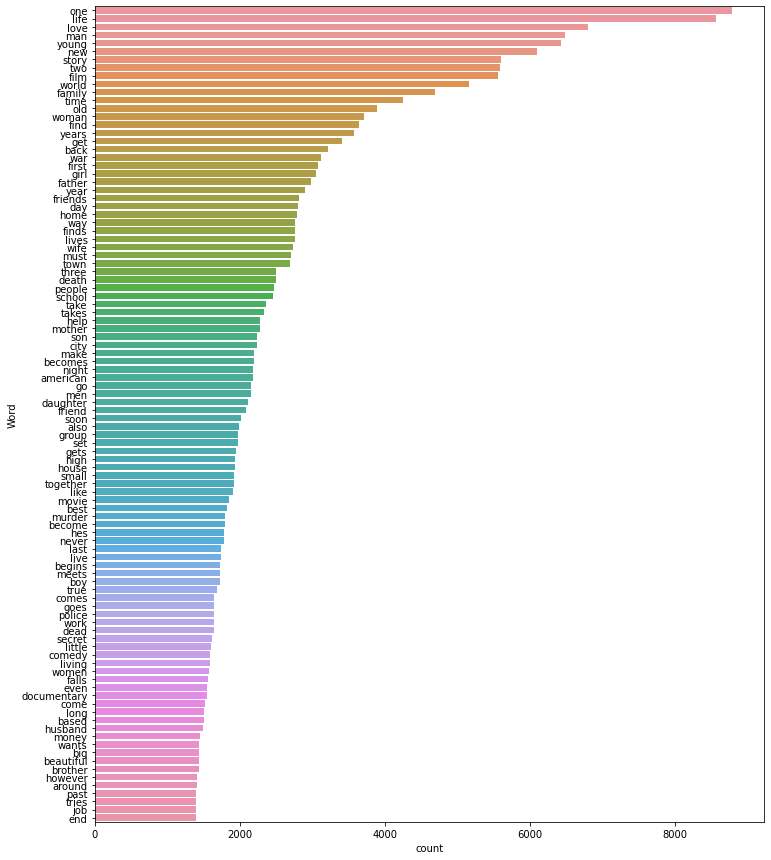

In [86]:
freq_words(data['clean_plot'], 100)

Word cloud of complete text (title,tagline,overview)

<Figure size 432x288 with 0 Axes>

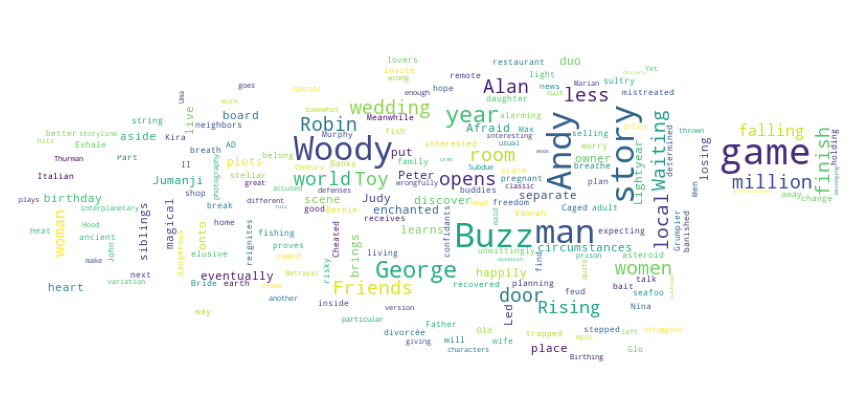

In [171]:
from wordcloud import WordCloud, STOPWORDS
from PIL import Image
a=str(data['complete_text'])
maskArray = np.array(Image.open("a.jpeg"))
cloud = WordCloud(background_color = "white", max_words = 200, mask = maskArray, stopwords = set(STOPWORDS))
cloud.generate(a)
cloud.to_file("wordCloud.png")


create_word_cloud(a)

print(cloud)
fig = plt.figure(1)
plt.figure(figsize=(15,30))
plt.imshow(cloud)
plt.axis('off')
plt.show()
fig.savefig("word1.png", dpi=900)

Word cloud of overview after preprocessing 

<Figure size 432x288 with 0 Axes>

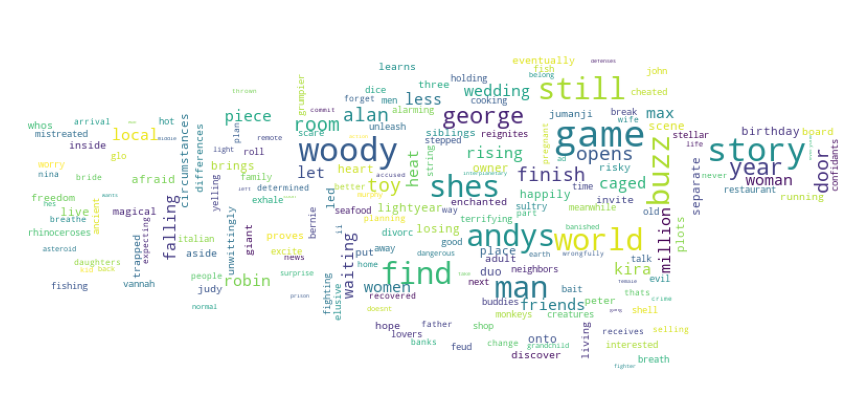

In [175]:
from wordcloud import WordCloud, STOPWORDS
from PIL import Image
a=str(data['clean_plot'])
maskArray = np.array(Image.open("a.jpeg"))
cloud = WordCloud(background_color = "white", max_words = 200, mask = maskArray, stopwords = set(STOPWORDS))
cloud.generate(a)
cloud.to_file("wordCloud.png")


create_word_cloud(a)

print(cloud)
fig = plt.figure(1)
plt.figure(figsize=(15,30))
plt.imshow(cloud)
plt.axis('off')
plt.show()
fig.savefig("word1.png", dpi=900)

word cloud of title

<Figure size 432x288 with 0 Axes>

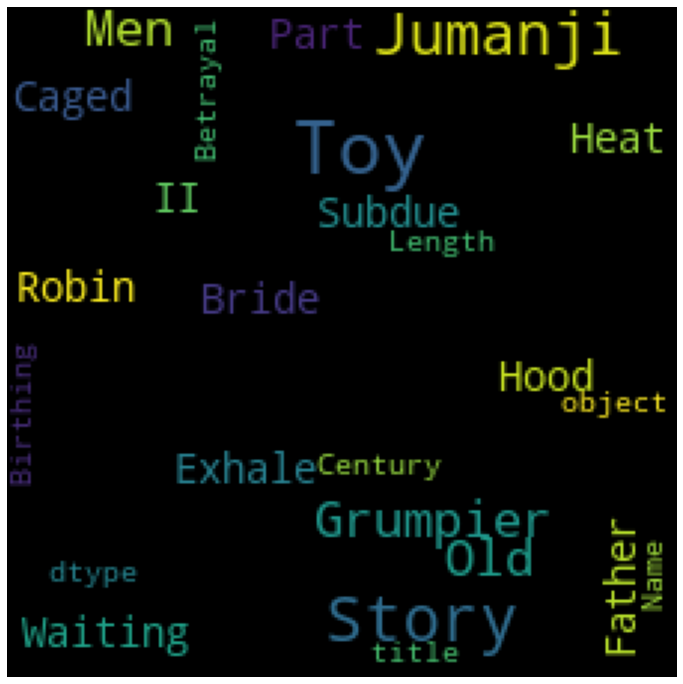

In [172]:
from wordcloud import WordCloud, STOPWORDS
from PIL import Image
a=str(data['title'])
maskArray = np.array(Image.open("download.jpg"))
cloud = WordCloud(background_color = "black", max_words = 200, mask = maskArray, stopwords = set(STOPWORDS))
cloud.generate(a)
cloud.to_file("wordCloud.png")


create_word_cloud(a)

print(cloud)
fig = plt.figure(1)
plt.figure(figsize=(12,20))
plt.imshow(cloud)
plt.axis('off')
plt.show()
fig.savefig("word1.png", dpi=900)

word cloud of tagline

<Figure size 432x288 with 0 Axes>

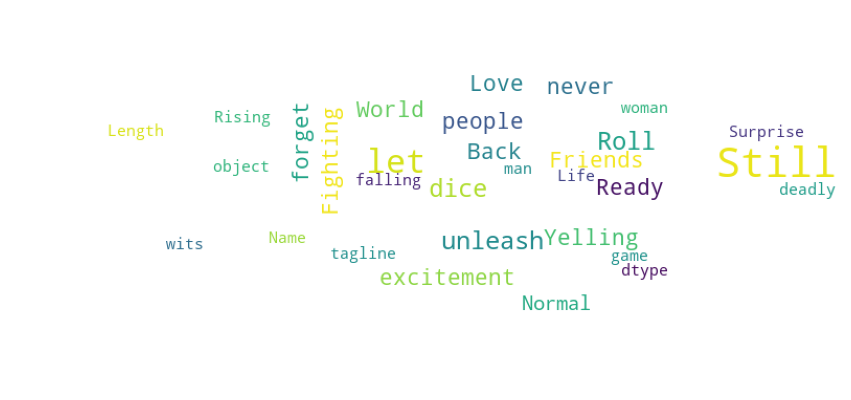

In [166]:
from wordcloud import WordCloud, STOPWORDS
from PIL import Image
a=str(data['tagline'])
maskArray = np.array(Image.open("a.jpeg"))
cloud = WordCloud(background_color = "white", max_words = 200, mask = maskArray, stopwords = set(STOPWORDS))
cloud.generate(a)
cloud.to_file("wordCloud.png")


create_word_cloud(a)

print(cloud)
fig = plt.figure(1)
plt.figure(figsize=(15,30))
plt.imshow(cloud)
plt.axis('off')
plt.show()
fig.savefig("word1.png", dpi=900)

<Figure size 432x288 with 0 Axes>

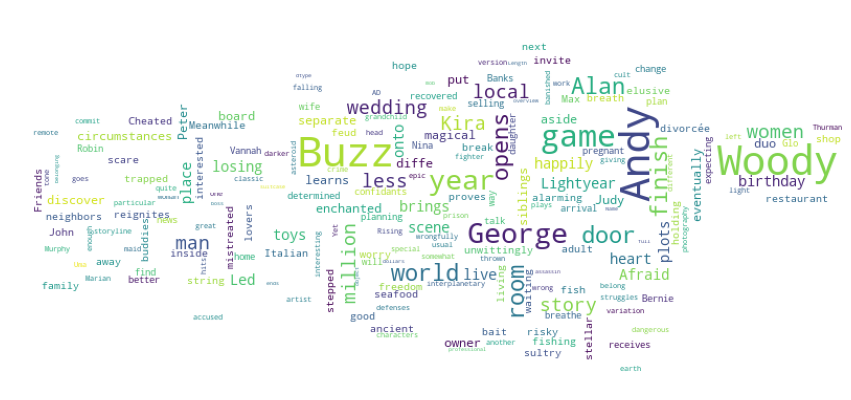

In [167]:
from wordcloud import WordCloud, STOPWORDS
from PIL import Image
a=str(data['overview'])
maskArray = np.array(Image.open("a.jpeg"))
cloud = WordCloud(background_color = "white", max_words = 200, mask = maskArray, stopwords = set(STOPWORDS))
cloud.generate(a)
cloud.to_file("wordCloud.png")


create_word_cloud(a)

print(cloud)
fig = plt.figure(1)
plt.figure(figsize=(15,30))
plt.imshow(cloud)
plt.axis('off')
plt.show()
fig.savefig("word1.png", dpi=900)

## We are dealing with multi class classification,hence conversion of list into multiple lables is really important.

In [0]:
from sklearn.preprocessing import MultiLabelBinarizer

multilabel_binarizer = MultiLabelBinarizer()
multilabel_binarizer.fit(data['new_genres'])

# transform target variable
y = multilabel_binarizer.transform(data['new_genres'])

In [0]:
tfidf_vectorizer = TfidfVectorizer(max_df=0.8, max_features=10000)

In [0]:
X=data['clean_plot']

In [0]:
xtrain, xval, ytrain, yval = train_test_split(X, y, test_size=0.2, random_state=9)


conversion of indpendent variables into vector form.

In [0]:
xtrain_tfidf = tfidf_vectorizer.fit_transform(xtrain)
xval_tfidf = tfidf_vectorizer.transform(xval)

# **Model building**

## **Logistic regression:**

In [0]:
from sklearn.linear_model import LogisticRegression

# Binary Relevance
from sklearn.multiclass import OneVsRestClassifier

# Performance metric
from sklearn.metrics import f1_score
from sklearn.metrics import precision_score
from sklearn.metrics import recall_score
from sklearn.metrics import accuracy_score

In [0]:
lr = LogisticRegression()
clf = OneVsRestClassifier(lr)

In [94]:
# fit model on train data
clf.fit(xtrain_tfidf, ytrain)

OneVsRestClassifier(estimator=LogisticRegression(C=1.0, class_weight=None,
                                                 dual=False, fit_intercept=True,
                                                 intercept_scaling=1,
                                                 l1_ratio=None, max_iter=100,
                                                 multi_class='auto',
                                                 n_jobs=None, penalty='l2',
                                                 random_state=None,
                                                 solver='lbfgs', tol=0.0001,
                                                 verbose=0, warm_start=False),
                    n_jobs=None)

In [0]:
# make predictions for validation set
y_pred = clf.predict(xval_tfidf)

In [96]:
y_pred[2]

array([0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0])

In [97]:
multilabel_binarizer.inverse_transform(y_pred)[2]

('Drama', 'History')

In [98]:
multilabel_binarizer.inverse_transform(yval)[2]

('Drama', 'History', 'War')

In [99]:
# evaluate performance
print("F1=",f1_score(y_pred, yval, average="micro"))
print("Precision=",precision_score(y_pred, yval, average="micro"))
print("recall=",recall_score(y_pred, yval, average="micro"))
print("Accuracy=",accuracy_score(y_pred, yval))


F1= 0.49625220458553787
Precision= 0.37421035132439323
recall= 0.736423118865867
Accuracy= 0.199674569967457


## **Observation of actual genre and predicted genre of a movie on test data with threeshold probability =0.5:**

In [0]:

def infer_tags(q):
    q = clean_text(q)
    q = remove_stopwords(q)
    q_vec = tfidf_vectorizer.transform([q])
    q_pred = clf.predict(q_vec)
    return multilabel_binarizer.inverse_transform(q_pred)

In [101]:

for i in range(10): 
  k = xval.sample(1).index[0] 
  print("Movie: ", data['title'][k], "\nPredicted genre: ", infer_tags(xval[k])), print("Actual genre: ",data['new_genres'][k], "\n")

Movie:  Snake in the Eagle's Shadow 
Predicted genre:  [('Action', 'Drama')]
Actual genre:  ['Action', 'Comedy'] 

Movie:  The Cave 
Predicted genre:  [()]
Actual genre:  ['Action', 'Adventure', 'Horror', 'Thriller'] 

Movie:  Race 
Predicted genre:  [('Drama',)]
Actual genre:  ['Action', 'Drama'] 

Movie:  The Air Up There 
Predicted genre:  [('Comedy', 'Drama')]
Actual genre:  ['Comedy', 'Family'] 

Movie:  Duck Dodgers in the 24½th Century 
Predicted genre:  [('Science Fiction',)]
Actual genre:  ['Animation', 'Comedy', 'Science Fiction'] 

Movie:  Jeff Foxworthy: Totally Committed 
Predicted genre:  [('Comedy',)]
Actual genre:  ['Comedy'] 

Movie:  Gifted Hands: The Ben Carson Story 
Predicted genre:  [('Drama',)]
Actual genre:  ['Drama'] 

Movie:  Cockpit 
Predicted genre:  [('Drama',)]
Actual genre:  ['Comedy'] 

Movie:  Utu 
Predicted genre:  [('Drama',)]
Actual genre:  ['War', 'Adventure', 'Drama', 'History'] 

Movie:  Banklady 
Predicted genre:  [('Drama',)]
Actual genre:  ['Ro

##**Experimentation:**

## For converting changing the classification from  0 to 1 in target variable the threeshold value is 0.5 let's change the threeshold value to 0.4 and then try.

In [0]:
#For converting a 0 to 1 in target variable the threeshold value is 0.5 let's change the threeshold value and then try.

# predict probabilities
y_pred_prob = clf.predict_proba(xval_tfidf)

In [0]:
t = 0.3 # threshold value
y_pred_new = (y_pred_prob >= t).astype(int)

In [104]:
# evaluate performance
print("F1=",f1_score(y_pred_new, yval, average="micro"))
print("Precision=",precision_score(y_pred_new, yval, average="micro"))
print("recall=",recall_score(y_pred_new, yval, average="micro"))
print("accuracy=",accuracy_score(y_pred_new, yval))

F1= 0.5928075216918228
Precision= 0.5887177213786989
recall= 0.5969545429004889
accuracy= 0.17410506741050674


## As the Evalution metric is not specified let's take f1 score as our evalution metric as it is the harmonic mean of precision and recall.

## **Observation:** after changing the threshold value for probability F1 score has increased pretty much.

In [0]:

def infer_tags(q):
    q = clean_text(q)
    q = remove_stopwords(q)
    q_vec = tfidf_vectorizer.transform([q])
    t = 0.4
    y_pred_prob = clf.predict_proba(q_vec)
    
    y_pred_new = (y_pred_prob >= t).astype(int)
    return multilabel_binarizer.inverse_transform(y_pred_new)

In [106]:

for i in range(10): 
  k = xval.sample(1).index[0] 
  print("Movie: ", data['title'][k], "\nPredicted genre: ", infer_tags(xval[k])), print("Actual genre: ",data['new_genres'][k], "\n")

Movie:  Chariot 
Predicted genre:  [()]
Actual genre:  ['Thriller', 'Drama'] 

Movie:  Orbiter 9 
Predicted genre:  [('Drama', 'Romance')]
Actual genre:  ['Drama', 'Science Fiction', 'Romance'] 

Movie:  Some Kind of Hero 
Predicted genre:  [('Comedy',)]
Actual genre:  ['Comedy', 'Drama'] 

Movie:  The Test-tube Adult and Simo's Angels 
Predicted genre:  [('Comedy', 'Drama')]
Actual genre:  ['Comedy'] 

Movie:  Losing Chase 
Predicted genre:  [('Drama',)]
Actual genre:  ['Drama', 'Romance'] 

Movie:  The forbidden education 
Predicted genre:  [()]
Actual genre:  ['Comedy', 'Documentary', 'Drama'] 

Movie:  The January Man 
Predicted genre:  [('Crime', 'Thriller')]
Actual genre:  ['Crime', 'Mystery', 'Thriller'] 

Movie:  Back in the Day 
Predicted genre:  [('Comedy',)]
Actual genre:  ['Comedy'] 

Movie:  Assigned to Danger 
Predicted genre:  [('Action', 'Crime', 'Thriller')]
Actual genre:  ['Crime', 'Drama'] 

Movie:  Treasure Island 
Predicted genre:  [('Adventure', 'Family')]
Actual 

## **Observation of actual genre and predicted genre of a movie on test data with threeshold probability =0.4:**

From the above experimentation we can observe that 10 out of 10 genres have been predicted atleast 1 prfectly on the test data,hence the changing in probability threeshold value has worked pretty.

## **let's try using  with n_gram_range=(1,2) on tfidf vectorizer:**

In [107]:
tfidf_vectorizer = TfidfVectorizer(ngram_range=(1,2),max_df=0.8)
xtrain_tfidf = tfidf_vectorizer.fit_transform(xtrain)
xval_tfidf = tfidf_vectorizer.transform(xval)
lr = LogisticRegression()
clf = OneVsRestClassifier(lr)
# fit model on train data
clf.fit(xtrain_tfidf, ytrain)

OneVsRestClassifier(estimator=LogisticRegression(C=1.0, class_weight=None,
                                                 dual=False, fit_intercept=True,
                                                 intercept_scaling=1,
                                                 l1_ratio=None, max_iter=100,
                                                 multi_class='auto',
                                                 n_jobs=None, penalty='l2',
                                                 random_state=None,
                                                 solver='lbfgs', tol=0.0001,
                                                 verbose=0, warm_start=False),
                    n_jobs=None)

In [0]:
# make predictions for validation set
y_pred = clf.predict(xval_tfidf)

In [109]:
# evaluate performance
print("F1=",f1_score(y_pred, yval, average="micro"))
print("Precision=",precision_score(y_pred, yval, average="micro"))
print("recall=",recall_score(y_pred, yval, average="micro"))
print("Accuracy=",accuracy_score(y_pred, yval))


F1= 0.4699527346387576
Precision= 0.3471129336140973
recall= 0.7273571760334417
Accuracy= 0.18793584379358438


## **Observation:** Decent scores,but we've got better already :p

Let's experiment by changing threshold probability

In [110]:
# predict probabilities
y_pred_prob = clf.predict_proba(xval_tfidf)
t = 0.4 # threshold value
y_pred_new = (y_pred_prob >= t).astype(int)
# evaluate performance
print("F1=",f1_score(y_pred_new, yval, average="micro"))
print("Precision=",precision_score(y_pred_new, yval, average="micro"))
print("recall=",recall_score(y_pred_new, yval, average="micro"))
print("accuracy=",accuracy_score(y_pred_new, yval))

F1= 0.5416707504328793
Precision= 0.45938158040563004
recall= 0.6598742338613388
accuracy= 0.19781496978149699


## **Observation:**We've got better recall and F1 scores here.Let's check the actual and predicted genres for the movie names.

In [111]:

def infer_tags(q):
    q = clean_text(q)
    q = remove_stopwords(q)
    q_vec = tfidf_vectorizer.transform([q])
    t = 0.4
    y_pred_prob = clf.predict_proba(q_vec)
    
    y_pred_new = (y_pred_prob >= t).astype(int)
    return multilabel_binarizer.inverse_transform(y_pred_new)


for i in range(5): 
  k = xval.sample(1).index[0] 
  print("Movie: ", data['title'][k], "\nPredicted genre: ", infer_tags(xval[k])), print("Actual genre: ",data['new_genres'][k], "\n")

Movie:  Ivory Tower 
Predicted genre:  [('Drama',)]
Actual genre:  ['Documentary'] 

Movie:  Maggie Simpson in The Longest Daycare 
Predicted genre:  [('Drama',)]
Actual genre:  ['Animation', 'Comedy'] 

Movie:  Detention 
Predicted genre:  [('Horror',)]
Actual genre:  ['Horror', 'Comedy', 'Science Fiction'] 

Movie:  Dance, Fools, Dance 
Predicted genre:  [('Drama', 'Romance')]
Actual genre:  ['Crime', 'Drama', 'Romance'] 

Movie:  High School Record 
Predicted genre:  [('Comedy',)]
Actual genre:  ['Comedy', 'Documentary'] 



## **let's try using  with n_gram_range=(1,3) on tfidf vectorizer:**

In [112]:
tfidf_vectorizer = TfidfVectorizer(ngram_range=(1,3),max_df=0.8)
xtrain_tfidf = tfidf_vectorizer.fit_transform(xtrain)
xval_tfidf = tfidf_vectorizer.transform(xval)
lr = LogisticRegression()
clf = OneVsRestClassifier(lr)
# fit model on train data
clf.fit(xtrain_tfidf, ytrain)

OneVsRestClassifier(estimator=LogisticRegression(C=1.0, class_weight=None,
                                                 dual=False, fit_intercept=True,
                                                 intercept_scaling=1,
                                                 l1_ratio=None, max_iter=100,
                                                 multi_class='auto',
                                                 n_jobs=None, penalty='l2',
                                                 random_state=None,
                                                 solver='lbfgs', tol=0.0001,
                                                 verbose=0, warm_start=False),
                    n_jobs=None)

In [113]:
# make predictions for validation set
y_pred = clf.predict(xval_tfidf)
# evaluate performance
print("F1=",f1_score(y_pred, yval, average="micro"))
print("Precision=",precision_score(y_pred, yval, average="micro"))
print("recall=",recall_score(y_pred, yval, average="micro"))
print("Accuracy=",accuracy_score(y_pred, yval))



F1= 0.47023985786200767
Precision= 0.3519893605231076
recall= 0.7081382385730212
Accuracy= 0.18514644351464435


In [114]:
# predict probabilities
y_pred_prob = clf.predict_proba(xval_tfidf)
t = 0.3 # threshold value
y_pred_new = (y_pred_prob >= t).astype(int)
# evaluate performance
print("F1=",f1_score(y_pred_new, yval, average="micro"))
print("Precision=",precision_score(y_pred_new, yval, average="micro"))
print("recall=",recall_score(y_pred_new, yval, average="micro"))
print("accuracy=",accuracy_score(y_pred_new, yval))

F1= 0.5757492287351256
Precision= 0.5791311093871218
recall= 0.572406616277796
accuracy= 0.15423059042305903


## **Observation:**The above scores seeems pretty good and consistent with all the score

In [115]:

def infer_tags(q):
    q = clean_text(q)
    q = remove_stopwords(q)
    q_vec = tfidf_vectorizer.transform([q])
    t = 0.3
    y_pred_prob = clf.predict_proba(q_vec)
    
    y_pred_new = (y_pred_prob >= t).astype(int)
    return multilabel_binarizer.inverse_transform(y_pred_new)


for i in range(5): 
  k = xval.sample(1).index[0] 
  print("Movie: ", data['title'][k], "\nPredicted genre: ", infer_tags(xval[k])), print("Actual genre: ",data['new_genres'][k], "\n")

Movie:  The Sporting Club 
Predicted genre:  [('Drama',)]
Actual genre:  ['Comedy'] 

Movie:  Awake 
Predicted genre:  [('Drama',)]
Actual genre:  ['Thriller', 'Crime', 'Mystery'] 

Movie:  Die Konferenz der Tiere 
Predicted genre:  [('Comedy',)]
Actual genre:  ['Animation'] 

Movie:  To Singapore with Love 
Predicted genre:  [('Drama',)]
Actual genre:  ['Documentary'] 

Movie:  The Tale of the Princess Kaguya 
Predicted genre:  [('Drama', 'Thriller')]
Actual genre:  ['Animation', 'Drama', 'Fantasy'] 



## **Decision Tree Classifier:**

In [0]:
from sklearn.tree import DecisionTreeClassifier

tree = DecisionTreeClassifier(max_depth = 6,
                             
                             )

In [0]:
clf1 = OneVsRestClassifier(tree)

In [118]:
clf1.fit(xtrain_tfidf, ytrain)

OneVsRestClassifier(estimator=DecisionTreeClassifier(ccp_alpha=0.0,
                                                     class_weight=None,
                                                     criterion='gini',
                                                     max_depth=6,
                                                     max_features=None,
                                                     max_leaf_nodes=None,
                                                     min_impurity_decrease=0.0,
                                                     min_impurity_split=None,
                                                     min_samples_leaf=1,
                                                     min_samples_split=2,
                                                     min_weight_fraction_leaf=0.0,
                                                     presort='deprecated',
                                                     random_state=None,
                                          

In [0]:
y_pred_tree = clf1.predict(xval_tfidf)


In [120]:

# evaluate performance
print("F1=",f1_score(y_pred_tree, yval, average="micro"))
print("Precision=",precision_score(y_pred_tree, yval, average="micro"))
print("recall=",recall_score(y_pred_tree, yval, average="micro"))
print("Accuracy=",accuracy_score(y_pred_tree, yval))



F1= 0.3403358001114029
Precision= 0.2370054305663305
recall= 0.6034142212189616
Accuracy= 0.1101813110181311


## Changing the threeshold value of probabilities.

In [121]:
# predict probabilities
y_pred_prob = clf1.predict_proba(xval_tfidf)
t = 0.3 # threshold value
y_pred_new = (y_pred_prob >= t).astype(int)
# evaluate performance
print("F1=",f1_score(y_pred_new, yval, average="micro"))
print("Precision=",precision_score(y_pred_new, yval, average="micro"))
print("recall=",recall_score(y_pred_new, yval, average="micro"))
print("accuracy=",accuracy_score(y_pred_new, yval))

F1= 0.4519890462589441
Precision= 0.42530200598470574
recall= 0.48224945020420984
accuracy= 0.12087401208740121


## **Observation:**Decision tree classifier's performance is not great.

## **CountVectorizer:**

In [0]:
from sklearn.feature_extraction.text import CountVectorizer
cv = CountVectorizer(max_df=0.8)
xtrain_count = cv.fit_transform(xtrain)
xval_count = cv.transform(xval)


In [0]:
lr = LogisticRegression()
clf_count_log = OneVsRestClassifier(lr)

In [124]:
# fit model on train data
clf_count_log.fit(xtrain_count, ytrain)

/usr/local/lib/python3.6/dist-packages/sklearn/linear_model/_logistic.py:940: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  extra_warning_msg=_LOGISTIC_SOLVER_CONVERGENCE_MSG)
/usr/local/lib/python3.6/dist-packages/sklearn/linear_model/_logistic.py:940: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression


OneVsRestClassifier(estimator=LogisticRegression(C=1.0, class_weight=None,
                                                 dual=False, fit_intercept=True,
                                                 intercept_scaling=1,
                                                 l1_ratio=None, max_iter=100,
                                                 multi_class='auto',
                                                 n_jobs=None, penalty='l2',
                                                 random_state=None,
                                                 solver='lbfgs', tol=0.0001,
                                                 verbose=0, warm_start=False),
                    n_jobs=None)

In [125]:
y_pred_log_count=clf_count_log.predict(xval_count)
print("F1=",f1_score(y_pred_log_count, yval, average="micro"))
print("Precision=",precision_score(y_pred_log_count, yval, average="micro"))
print("recall=",recall_score(y_pred_log_count, yval, average="micro"))
print("accuracy=",accuracy_score(y_pred_log_count, yval))

F1= 0.542775484280724
Precision= 0.4735675495954782
recall= 0.635673906575424
accuracy= 0.1886331938633194


### **Observation:**F1 score has improved pretty well by using count vectorizer.

In [126]:
# predict probabilities
y_pred_prob = clf_count_log.predict_proba(xval_count)
t = 0.3 # threshold value
y_pred_new = (y_pred_prob >= t).astype(int)
# evaluate performance
print("F1=",f1_score(y_pred_new, yval, average="micro"))
print("Precision=",precision_score(y_pred_new, yval, average="micro"))
print("recall=",recall_score(y_pred_new, yval, average="micro"))
print("accuracy=",accuracy_score(y_pred_new, yval))

F1= 0.5744456747778648
Precision= 0.5893272747423252
recall= 0.5602971392445076
accuracy= 0.15806601580660157


### **Observation:**There was a decent increase in scores by changinf the threeshold.

## **Using n_gram_range hyperparameter on count vectorizer.**

In [0]:
from sklearn.feature_extraction.text import CountVectorizer
cv = CountVectorizer(ngram_range=(1,3) ,max_df=0.8)
xtrain_count = cv.fit_transform(xtrain)
xval_count = cv.transform(xval)


In [0]:
lr = LogisticRegression()
clf_count_log = OneVsRestClassifier(lr)

In [129]:
# fit model on train data
clf_count_log.fit(xtrain_count, ytrain)

/usr/local/lib/python3.6/dist-packages/sklearn/linear_model/_logistic.py:940: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  extra_warning_msg=_LOGISTIC_SOLVER_CONVERGENCE_MSG)
/usr/local/lib/python3.6/dist-packages/sklearn/linear_model/_logistic.py:940: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression


OneVsRestClassifier(estimator=LogisticRegression(C=1.0, class_weight=None,
                                                 dual=False, fit_intercept=True,
                                                 intercept_scaling=1,
                                                 l1_ratio=None, max_iter=100,
                                                 multi_class='auto',
                                                 n_jobs=None, penalty='l2',
                                                 random_state=None,
                                                 solver='lbfgs', tol=0.0001,
                                                 verbose=0, warm_start=False),
                    n_jobs=None)

In [130]:
y_pred_log_count=clf_count_log.predict(xval_count)
print("F1=",f1_score(y_pred_log_count, yval, average="micro"))
print("Precision=",precision_score(y_pred_log_count, yval, average="micro"))
print("recall=",recall_score(y_pred_log_count, yval, average="micro"))
print("accuracy=",accuracy_score(y_pred_log_count, yval))

F1= 0.5273300630693765
Precision= 0.4169899146625291
recall= 0.7170764246235944
accuracy= 0.2111808461180846


In [131]:
# predict probabilities
y_pred_prob = clf_count_log.predict_proba(xval_count)
t = 0.3 # threshold value
y_pred_new = (y_pred_prob >= t).astype(int)
# evaluate performance
print("F1=",f1_score(y_pred_new, yval, average="micro"))
print("Precision=",precision_score(y_pred_new, yval, average="micro"))
print("recall=",recall_score(y_pred_new, yval, average="micro"))
print("accuracy=",accuracy_score(y_pred_new, yval))

F1= 0.5843603909902252
Precision= 0.5333591931730023
recall= 0.6461466165413534
accuracy= 0.20734542073454207


## **obsrvation:**Count vertorizing using ngram has shown pretty good results on Logistic regression.

## **Random Forest classifier on count vectorizer**

In [0]:
from sklearn.ensemble import RandomForestClassifier

In [0]:
rf = RandomForestClassifier(n_estimators=100,max_depth=3)
clf_rf_count = OneVsRestClassifier(rf)

In [0]:
from sklearn.feature_extraction.text import CountVectorizer
cv = CountVectorizer(max_df=0.8)
xtrain_count = cv.fit_transform(xtrain)
xval_count = cv.transform(xval)

In [135]:
clf_rf_count.fit(xtrain_count,ytrain)

OneVsRestClassifier(estimator=RandomForestClassifier(bootstrap=True,
                                                     ccp_alpha=0.0,
                                                     class_weight=None,
                                                     criterion='gini',
                                                     max_depth=3,
                                                     max_features='auto',
                                                     max_leaf_nodes=None,
                                                     max_samples=None,
                                                     min_impurity_decrease=0.0,
                                                     min_impurity_split=None,
                                                     min_samples_leaf=1,
                                                     min_samples_split=2,
                                                     min_weight_fraction_leaf=0.0,
                                               

In [136]:
y_pred_log_count=clf_rf_count.predict(xval_count)
print("F1=",f1_score(y_pred_log_count, yval, average="micro"))
print("Precision=",precision_score(y_pred_log_count, yval, average="micro"))
print("recall=",recall_score(y_pred_log_count, yval, average="micro"))
print("accuracy=",accuracy_score(y_pred_log_count, yval))

F1= 0.0005539552404165743
Precision= 0.000277069710739222
recall= 0.8333333333333334
accuracy= 0.00011622501162250116


## **Observation**:Random forest has'nt given  a decent score to count on.

# **Overview of scores of all models.**

![alt text](https://drive.google.com/uc?id=1R0Pd8ouryftfRTIIuxrHj4MhNH4HKo8w)